In [1]:
# ==============================================================================
# Imports
# ==============================================================================
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import Counter
import time

In [2]:
# Create graph
graph = nx.DiGraph()

with open("email-Enron.txt") as f:
    reader = csv.reader(f, delimiter='\t')
    for line in reader:
        start = int(line[0])
        end = int(line[1])
        graph.add_edge(start, end)

# Transform graph from directed to undirected
graph = graph.to_undirected()

In [3]:
# ==============================================================================
# 1. Finding the largest connected component
# ==============================================================================

# 1a. Create a function to recursively assign nodes ============================
"""
assign_recursive(): assigns nodes to an unique identifier if they are in the 
    same connected component
    inputs: 
        g - networkx graph
        c - dictionary
        starting_node - node from g
        identifier - integer value
    output: N/A
"""
def assign_recursive(g, c, starting_node, identifier):
    # Add the key starting_node to c, with value identifier
    c[starting_node] = identifier

    # Keep track of unlabeled neighbors
    unlabeledNeighbors = []

    # label all unlabeled neighbors
    for z in g.neighbors(starting_node):
        if z not in c:
            c[z] = identifier
            unlabeledNeighbors.append(z)
    
    # recurse over unlabeled neighbors
    for z in unlabeledNeighbors:
        assign_recursive(g, c, z, identifier)

In [4]:
# 1b. Compute the connected components =========================================

# initialize empty dict to populate with nodes, c[node] = identifier
c = {}
# unique identifier
curr_indentifier = 0

for v in graph.nodes():
    if v not in c:
        # update identifier for each new component
        curr_indentifier += 1
        assign_recursive(graph, c, v, curr_indentifier)

# dict of frequency of identifiers, identifier_count[identifier] = freq
identifier_count = dict(Counter(c.values()).items())

# sort frequencies into list of tuples [(identifier, freq)] from greatest to least
sorted_identifier_count = sorted(identifier_count.items(), key = lambda x: x[1], reverse = True)

# print 10 largest connected components
# [(1, 33696), (270, 20), (755, 16), (921, 14), (151, 13), (427, 13), (922, 13), (224, 12), (659, 12), (876, 12)]
print(sorted_identifier_count[:10])

[(1, 33696), (270, 20), (755, 16), (921, 14), (151, 13), (427, 13), (922, 13), (224, 12), (659, 12), (876, 12)]


In [5]:
# 1c. Remove the nodes not in the largest component ============================

# find the identifier for largest component
largestCompIdentifier = sorted_identifier_count[0][0]

# remove nodes not in largest component
for v in c.keys():
    if c[v] != largestCompIdentifier:
        graph.remove_node(v)

In [6]:
# ==============================================================================
# 2. Implement BFS
# ==============================================================================

"""
BFS(): runs BFS with source s on graph G
    inputs: 
        s - source node from G
        G - networkx graph (connected and undirected)
    output: dictionary d such that d[v] is the SP distance of v from s
"""
def BFS(G, s):
    d = {} # dictionary d[node] = distance of node from source s
    queue = [] 

    # add source
    queue.append(s)
    d[s] = 0

    # while queue is not empty
    while len(queue) > 0:
        currNode = queue.pop(0)
        for neighbor in G.neighbors(currNode):
            if neighbor not in d:
                queue.append(neighbor)
                d[neighbor] = d[currNode] + 1
    return d

In [7]:
# ==============================================================================
# 3. Implement the exact algorithm for closeness centrality
# ==============================================================================
"""
closeness_vertex(): returns the closeness of s in G
    inputs: 
        s - source node from G
        G - networkx graph (connected and undirected)
    output: closeness of s in G (float)
"""
def closeness_vertex(G, s):
    # number of nodes
    n = len(G.nodes())
    distances = BFS(G, s)
    sum_distances = 0

    # caluclate sum of all distances
    for dist in distances.values():
        sum_distances += dist

    closeness = (n-1)/sum_distances
    return closeness

"""
closeness(): returns a dictionary cc s.t. cc[v] is the closeness of vertex v
    input: 
        G - networkx graph (connected and undirected)
    output: dictionary cc s.t. cc[v] is the closeness of vertex v
"""
def closeness(G):
    cc = {}
    for v in G.nodes():
        cc[v] = closeness_vertex(G, v)
    return cc

In [8]:
# exact functions as above but using networkx implementation of BFS
def closeness_vertex_nx(G, s):
    # number of nodes
    n = len(G.nodes())
    distances = nx.shortest_path_length(G, source = s)
    sum_distances = 0

    # caluclate sum of all distances
    for dist in distances.values():
        sum_distances += dist

    closeness = (n-1)/sum_distances
    return closeness

def closeness_nx(G):
    cc = {}
    for v in G.nodes():
        cc[v] = closeness_vertex_nx(G, v)
    return cc

In [9]:
# Exact time to run the algorithm for closeness centrality 
cc_start = time.time()
cc = closeness_nx(graph)
cc_end = time.time()
cc_time = cc_end - cc_start
print(cc_time)

1648.576646566391


In [10]:
cc_time/60

27.476277442773185

In [11]:
# sort scores into list of tuples [(node, score)] from greatest to least
sorted_cc =  sorted(cc.items(), key = lambda x: x[1], reverse = True)

# print 15 highest closeness centrality
# [(136, 0.3873700910512278), (76, 0.3861183049526734), (46, 0.3790810701347794), 
# (140, 0.37475531630928016), (370, 0.374522052285257), (292, 0.37433481830402277), 
# (195, 0.37398996625821346), (734, 0.3739567610760898), (175, 0.373790823571175), 
# (416, 0.3723410133156528), (1139, 0.36917126829695857), (458, 0.36829564209905014), 
# (444, 0.36808643121661333), (566, 0.36778510303877054), (353, 0.36742015331435984)]
print(sorted_cc[:15])

[(136, 0.3873700910512278), (76, 0.3861183049526734), (46, 0.3790810701347794), (140, 0.37475531630928016), (370, 0.374522052285257), (292, 0.37433481830402277), (195, 0.37398996625821346), (734, 0.3739567610760898), (175, 0.373790823571175), (416, 0.3723410133156528), (1139, 0.36917126829695857), (458, 0.36829564209905014), (444, 0.36808643121661333), (566, 0.36778510303877054), (353, 0.36742015331435984)]


In [12]:
# ==============================================================================
# 4. Implement the Eppstein-Wang approximation algorithm
# ==============================================================================

"""
ewapproxcloseness(): approximates closeness of each vertex in a graph
    inputs: 
        G - networkx graph (connected and undirected)
        k - sample size (int)
    output: 
        tuple (acc, sources) where:
            acc is a dictionary s.t. acc[v] is the approximate closeness of
            vertex v computed using k samples
            sources is a list of the sources used by the algorithm
"""
def ewapproxcloseness(G, k):
    sources = np.random.choice(G.nodes(), size = k)
    acc = {}
    n = len(G.nodes())

    distances = {} 

    # calculate exact closeness centrality for sources
    for v_i in sources:
        distances[v_i] = BFS(G, v_i)

    # iterate through each node in G
    for v in G.nodes():
        if v not in sources:
            approxCentrality = 0.0
            # run k iterations for each node
            for i in range(1, k+1):
                approxCentrality += n*distances[sources[i-1]][v]/(k*(n-1))

            acc[v] = 1/approxCentrality
        else:
            acc[v] = closeness_vertex(G, v)

    return (acc, sources)

In [13]:
def ewapproxcloseness_nx(G, k):
    sources = np.random.choice(G.nodes(), size = k)
    acc = {}
    n = len(G.nodes())

    distances = {} 

    # calculate exact closeness centrality for sources
    for v_i in sources:
        distances[v_i] = nx.shortest_path_length(G, source = v_i)

    # iterate through each node in G
    for v in G.nodes():
        if v not in sources:
            approxCentrality = 0.0
            # run k iterations for each node
            for i in range(1, k+1):
                approxCentrality += n*distances[sources[i-1]][v]/(k*(n-1))

            acc[v] = 1/approxCentrality
        else:
            acc[v] = closeness_vertex_nx(G, v)

    return (acc, sources)

In [14]:
k_values = [2500, 5000, 7500, 10000, 12500]
k_ewapprox_times = {} # run times in minutes based on k value
k_ewapprox = {} # output per k value

for value in k_values:
    start = time.time()
    testRun = ewapproxcloseness_nx(graph, value)
    end = time.time()
    
    k_ewapprox[value] = testRun
    k_ewapprox_times[value] = (end - start)/60

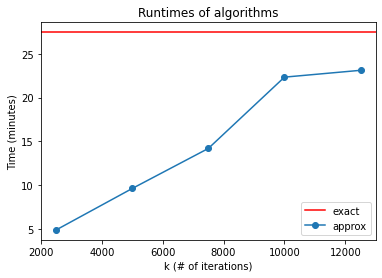

In [15]:
plt.axhline(y = cc_time/60, color = 'r', label = 'exact')
plt.plot(k_ewapprox_times.keys(), k_ewapprox_times.values(), marker='o', label = 'approx')
plt.xlabel('k (# of iterations)') 
plt.ylabel('Time (minutes)')
plt.legend(loc= 'lower right')
  
# displaying the title
plt.title("Runtimes of algorithms")
plt.show()

In [16]:
print(k_ewapprox_times)

{2500: 4.862294209003449, 5000: 9.6032501856486, 7500: 14.183581137657166, 10000: 22.33936465581258, 12500: 23.120983095963798}


In [17]:
distOfErrors = {}
# For the same values of k as above, 
# plot the minimum, 1st quartile, median, third quartile, and maximum of the distribution of the error |cc[v] - acc[v]| 
# over all vertices. 
# Comment on what you observe, both in terms of the behavior as k varies, and in terms of the distribution for fixed k.
for v in graph.nodes():
    errors = []
    for value in k_values:
        currError = abs(cc[v] - k_ewapprox[value][0][v])
        errors.append(currError)
    #distOfErrors.append(errors)
    distOfErrors[v] = errors

In [18]:
distOfErrors = []
for value in k_values:
    errors = []
    for v in graph.nodes():
        currError = abs(cc[v] - k_ewapprox[value][0][v])
        errors.append(currError)
    distOfErrors.append(errors)
    #distOfErrors[value] = errors

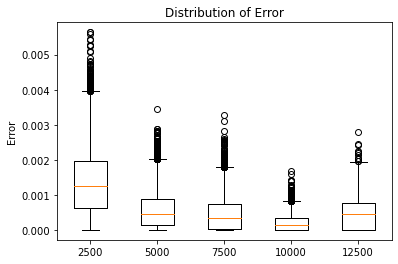

In [19]:
plt.boxplot(distOfErrors, labels = k_values) 
plt.ylabel('Error')
plt.title('Distribution of Error')
plt.show()

In [20]:
distOfErrors_noSources = []
for value in k_values:
    errors = []
    for v in graph.nodes():
        sources = k_ewapprox[value][1]
        if v not in sources:
            currError = abs(cc[v] - k_ewapprox[value][0][v])
            errors.append(currError)
    distOfErrors_noSources.append(errors)

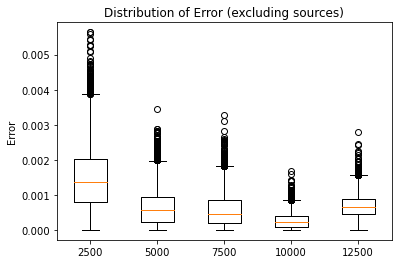

In [21]:
plt.boxplot(distOfErrors_noSources, labels = k_values) 
plt.ylabel('Error')
plt.title('Distribution of Error (excluding sources)')
plt.show()